# Introduction

This library implements a multi-objective (2, 3 and 4 objectives are supported) non-dominated archive. It provides easy and fast access to the overall hypervolume, the contributing hypervolume of each element, and to the [uncrowded hypervolume improvement](https://arxiv.org/abs/1904.08823) of any given point in objective space.



### Initialization of `MOArchive` for 2, 3 and 4 objectives
MOArchive object can be created using `get_archive` function providing a list of objective values and the reference point. Additionally, a list of information strings can be provided for each point, which can store any information about the points (e.g. the x values used to generate the objective values). At any point you can get the nondominated points and their corresponding infos in the archive, by using points and infos attributes

In [1]:
from moarchiving.get_archive import new_archive

In [2]:
# Creating a 2-objective archive
moa2d = new_archive([[-0.749, -1.188], [-0.557, 1.1076], [0.2454, 0.4724], [-1.146, -0.110]], reference_point=[10, 10], infos=["a", "b", "c", "d"])
print("points in the archive:", list(moa2d))
print("infos of the corresponding points:", moa2d.infos)

points in the archive: [[-1.146, -0.11], [-0.749, -1.188]]
infos of the corresponding points: ['d', 'a']


In [3]:
# Creating a 3-objective archive
moa3d = new_archive([[-0.749, -1.188, 0.341], [-0.557, 1.1076, 3.896], [0.2454, 0.4724, -0.234], [5.433, -1.146, -0.110]], [10, 10, 10], ["a", "b", "c", "d"])
print("points in the archive:", list(moa3d))
print("infos of the corresponding points:", moa3d.infos)

points in the archive: [[0.2454, 0.4724, -0.234], [5.433, -1.146, -0.11], [-0.749, -1.188, 0.341]]
infos of the corresponding points: ['c', 'd', 'a']


In [4]:
moa4d = new_archive([[-0.749, -1.188, 0.341, 0.123], [-0.557, 1.1076, 3.896, 0.123], [0.2454, 0.4724, -0.234, 0.123], [5.433, -1.146, -0.110, 0.123]],
                    [10, 10, 10, 10], ["a", "b", "c", "d"])
print("points in the archive:", list(moa4d))
print("infos of the corresponding points:", moa4d.infos)

points in the archive: [[0.2454, 0.4724, -0.234, 0.123], [5.433, -1.146, -0.11, 0.123], [-0.749, -1.188, 0.341, 0.123]]
infos of the corresponding points: ['c', 'd', 'a']


### Initializing empty archive and adding points
MoArchive can also be initialized empty, but at minimum the reference point or the number of objectives should be provided.

In [5]:
moa = new_archive(reference_point=[4, 4, 4])
print("points in the archive:", list(moa))
print("infos of the corresponding points:", moa.infos)

points in the archive: []
infos of the corresponding points: []


Points can alway be added to the archive using the `add` method (for adding one point) and `add_list` (for adding multiple points).

In [6]:
# add one point
moa.add([1, 2, 3], "a")
print("points:", list(moa))
print("infos:", moa.infos)

# add another point
moa.add([3, 2, 1], "b")
print("points:", list(moa))
print("infos:", moa.infos)

# add a dominated point (should not be added)
moa.add([3, 3, 3], "c")
print("points:", list(moa))
print("infos:", moa.infos)

moa.add_list([[2, 1, 3], [1, 3, 2], [3, 2, 0], [2, 2, 4]], ["d", "e", "f", "g"])
print("points:", list(moa))
print("infos:", moa.infos)

points: [[1, 2, 3]]
infos: ['a']
points: [[3, 2, 1], [1, 2, 3]]
infos: ['b', 'a']
points: [[3, 2, 1], [1, 2, 3]]
infos: ['b', 'a']
points: [[3, 2, 0], [1, 3, 2], [2, 1, 3], [1, 2, 3]]
infos: ['f', 'e', 'd', 'a']


### Length of the archive
Can be accessed either using the `__len__` method or. This is faster than manually doing `len(list(moa))`.

In [7]:
len(moa)

4

### Checking if point is in the archive
Can be done using `in` keyword

In [8]:
[2, 2, 2] in moa

False

In [9]:
[3, 2, 0] in moa

True

### Hypervolume computation
At any point we can access the hypervolume of the archive using the `hypervolume` attribute.

In [10]:
moa.hypervolume

Fraction(16, 1)

### Dominates and dominators:
Functions to check if the archive dominates a given point and to get all the points that dominate it

In [11]:
moa.dominates([2, 3, 3]), moa.dominators([2, 3, 3])

(True, [[1, 3, 2], [2, 1, 3], [1, 2, 3]])

In [12]:
moa.dominates([3, 1, 1]), moa.dominators([3, 1, 1])


(False, [])

### Contributing hypervolumes
Returns a list of contributions for each point of the archive. Alternatively can also be computed for a single point using `contributing_hypervolume(point)` method.

In [13]:
moa.contributing_hypervolumes

[Fraction(5, 1), Fraction(2, 1), Fraction(2, 1), Fraction(1, 1)]

In [14]:
for i, point in enumerate(moa):
    assert moa.contributing_hypervolume(point) == moa.contributing_hypervolumes[i]
    print("contributing hv of point", point, "is", moa.contributing_hypervolume(point))

contributing hv of point [3, 2, 0] is 5
contributing hv of point [1, 3, 2] is 2
contributing hv of point [2, 1, 3] is 2
contributing hv of point [1, 2, 3] is 1


### Hypervolume improvement
Returns the improvement of the hypervolume if we would add the point to the archive.

In [15]:
print(moa.dominates([3, 3, 3]))
moa.hypervolume_improvement([3, 3, 3])

True


-0.0

In [16]:
print("hypervolume:", moa.hypervolume)
print("hv improvement of adding [2, 2, 2]:", moa.hypervolume_improvement([2, 2, 2]))
moa.add([2, 2, 2])
print("new hypervolume", moa.hypervolume)

hypervolume: 16
hv improvement of adding [2, 2, 2]: 1
new hypervolume 17


### Distance to pareto front
Returns the distance between a dominated point and the pareto front.

In [17]:
moa.distance_to_pareto_front([3, 3, 2])

0.0

In [18]:
moa.distance_to_pareto_front([4, 3, 3])

1.0

### Distance to hypervolume area, in domain
Returns if the point is in domain the area dominat distance to the area dominated by the 

In [19]:
moa.in_domain([3, 3, 3]), moa.distance_to_hypervolume_area([3, 3, 3])

(True, 0.0)

In [20]:
moa.in_domain([5, 5, 5]), moa.distance_to_hypervolume_area([5, 5, 5])

(False, 1.7320508075688772)

In [21]:
moa.in_domain([1, 1, 14]), moa.distance_to_hypervolume_area([1, 1, 14])

(False, 10.0)

### Copying an archive

In [22]:
moa_copy = moa.copy()
print("moa", list(moa))
print("moa_copy", list(moa_copy))

moa [[3, 2, 0], [2, 2, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]
moa_copy [[3, 2, 0], [2, 2, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]


In [23]:
moa.add([1, 0, 2])
print("moa", list(moa))
print("moa_copy", list(moa_copy))

moa [[3, 2, 0], [1, 0, 2]]
moa_copy [[3, 2, 0], [2, 2, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]


In [24]:
moa_copy.remove([3, 2, 0])
print("moa", list(moa))
print("moa_copy", list(moa_copy))

moa [[3, 2, 0], [1, 0, 2]]
moa_copy [[2, 2, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]


### Turning fractions on and off
To avoid the loss of precision, fractions are used by default. Changing this to float can be done by setting function attributes `hypervolume_final_float_type` and `hypervolume_computation_float_type`.

In [25]:
moa3_fr = new_archive([[1, 2, 3], [2, 1, 3], [3, 3, 1.32], [1.3, 1.3, 3], [1.7, 1.1, 2]], reference_point=[4, 4, 4])
print(moa3_fr.hypervolume)

new_archive.hypervolume_computation_float_type = float
new_archive.hypervolume_final_float_type = float

moa3_nofr = new_archive([[1, 2, 3], [2, 1, 3], [3, 3, 1.32], [1.3, 1.3, 3], [1.7, 1.1, 2]], reference_point=[4, 4, 4])
print(moa3_nofr.hypervolume)

161245156349030777798724819133399/10141204801825835211973625643008
15.899999999999999


### Hypervolume plus indicator
At any point, also the hypervolume plus indicator can be returned from the archive. Here is an example of saving both hypervolume and hypervolume plus, to show the convergence of the algorithm.

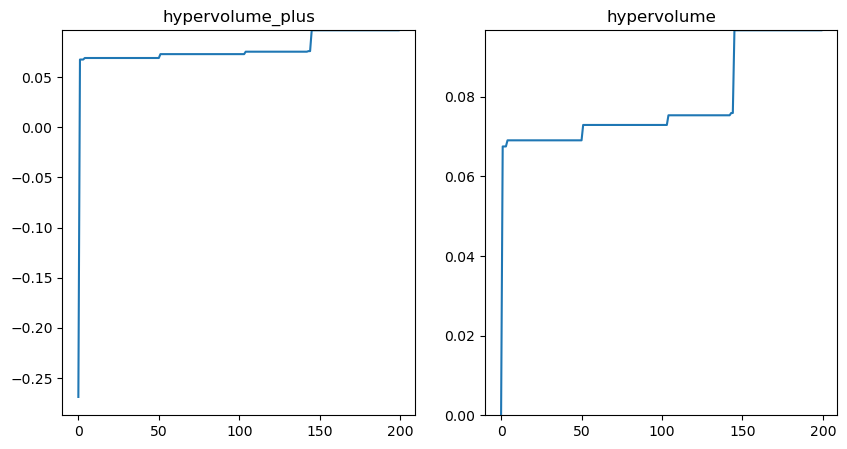

In [26]:
import matplotlib.pyplot as plt
import random

hv_plus = []
hv = []
n_obj = 3
moa = new_archive(reference_point=[0.5] * n_obj, n_obj=n_obj)
for _ in range(200):
    point = [random.random() for _ in range(n_obj)]
    moa.add(point)
    
    hv_plus.append(moa.hypervolume_plus)
    hv.append(moa.hypervolume)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hv_plus)
axs[0].set_title("hypervolume_plus")
m = float(max(hv_plus))
axs[0].set_ylim(None, m)
axs[1].set_ylim(None, m)
axs[1].plot(hv)
axs[1].set_title("hypervolume")
plt.show()